# Exercise

Many problems in astrophysics give rise to data with multiple modes. This is typically because different physical processes contribute to the observed dataset. For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarios include the evolution of isolated binaries in the galactic field and the dynamical assembly of sources in dense environments like globular clusters.

Right now, state-of-the-art analyses seems to say that many channels are all at play. LIGO measures the masses of many black holes. You can find the dataset at `solutions/formationchannels.npy`.

*Hint*: Note that the data provided are of shape (N, 1), not (N,). It's the format that sklearn wants. A useful tool to convert between the two is [np.newaxis](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it).

---------------------------------------------

$x = np.linspace(0, 5, 6)$

$print(x, x.shape)$

$print(x[np.newaxis,:], x[np.newaxis,:].shape)$

$print(x[:,np.newaxis], x[:,np.newaxis].shape)$

---------------------------------------------

Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.** The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$, standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability).

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

3) Complete the fit 10 times with $N=1, ..., 10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (it's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data.

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

I first download and visualize the data set with a histogram.

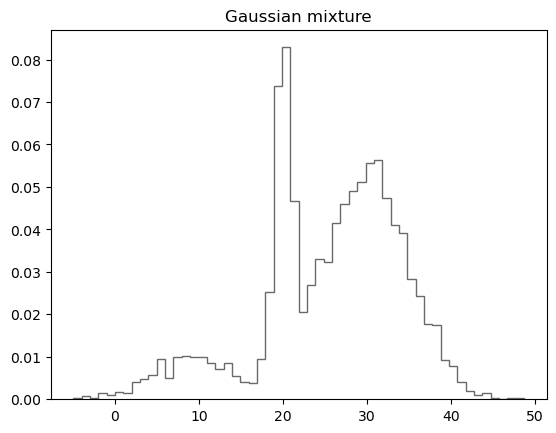

In [2]:
data = np.load("C:/Users/beasa/Desktop/astrostatistics_bicocca_2024/solutions/formationchannels.npy")
Nbins = int(np.sqrt(len(data)))
plt.hist(data, bins=Nbins, density=True, edgecolor='dimgrey', histtype='step')
plt.title('Gaussian mixture')
plt.show()

To first place, the distribution seems to be formed by three Gaussian distributions, therefore I fit it with a Gaussian mixture model with a number of components equal to $3$.

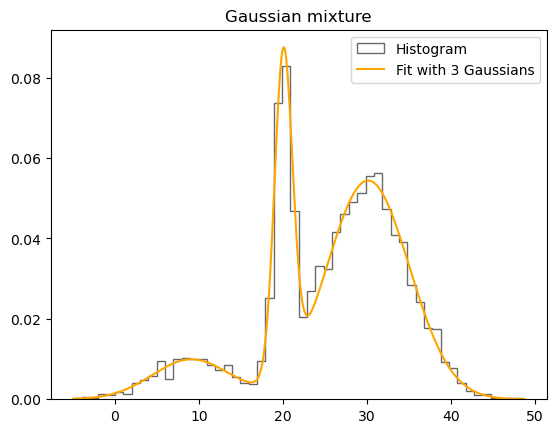

In [3]:
gm = GaussianMixture(n_components=3, random_state=0).fit(data)

M = 10000
x = np.linspace(data.min(), data.max(), M)

plt.hist(data, bins=Nbins, density=True, edgecolor='dimgrey', histtype='step', label='Histogram')
# gm.score_samples() computes the logarithm of the pdf, therefore to get the pdf I have to use np.exp()
plt.plot(x, np.exp(gm.score_samples(x[:, np.newaxis])), label='Fit with 3 Gaussians', color='orange')
plt.legend()
plt.title('Gaussian mixture')
plt.show()

I want now to make a fit of the distribution by using different values for the number of components, therefore I create an array $N$ of number of components and I make the Gaussian Mixture fit for all of them, by saving each time the result for the corresponding AIC.

In [4]:
N = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
AIC = []

for n in N:
    gm2 = GaussianMixture(n_components=n, random_state=0).fit(data)
    AIC.append(gm2.aic(data))

print(AIC)

[20945.972608590197, 20754.158751877432, 20083.3091553091, 20101.60043333141, 20114.095745675375, 20122.766659116474, 20131.590157331997, 20128.15439190298, 20134.03432161794, 20141.90627310284]


I visualize the AIC as a function of the number of components.

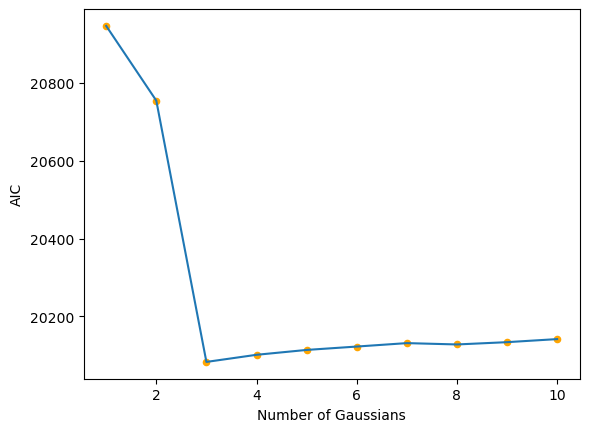

In [5]:
plt.scatter(N, AIC, color='orange', s=20)
plt.plot(N, AIC, label='AIC')
plt.xlabel('Number of Gaussians')
plt.ylabel('AIC')
plt.show()

As I can see, the AIC is minimized at $N=3$. Therefore I plot the corresponding fit on top of the distribution of the data. In addiction, I compute the meana, the covariances and the weights of the three Gaussian distributions obtained from this fit.

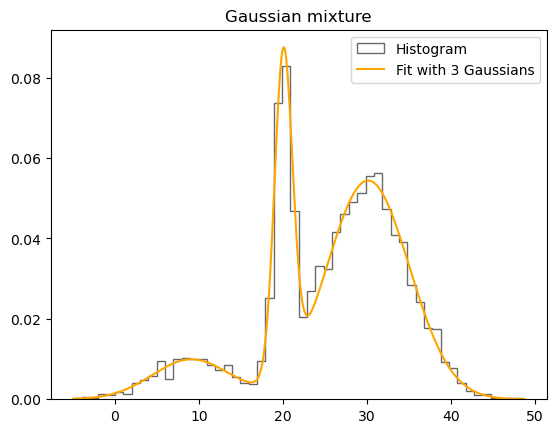

In [6]:
means = gm.means_.flatten()  # means of the three Gaussians
cov = gm.covariances_.flatten()  # covariances of the three Gaussians
weights = gm.weights_.flatten()  # weights of the three Gaussians

plt.hist(data, bins=Nbins, density=True, edgecolor='dimgrey', histtype='step', label='Histogram')
plt.plot(x, np.exp(gm.score_samples(x[:, np.newaxis])), label='Fit with 3 Gaussians', color='orange')
plt.legend()
plt.title('Gaussian mixture')
plt.show()

To study the three Gaussian distributions separetly, I compute the expression of each distribution by using the weights, the means and the covariances previously obtained. Then, I plot the results with different colors to better visualize the three components.

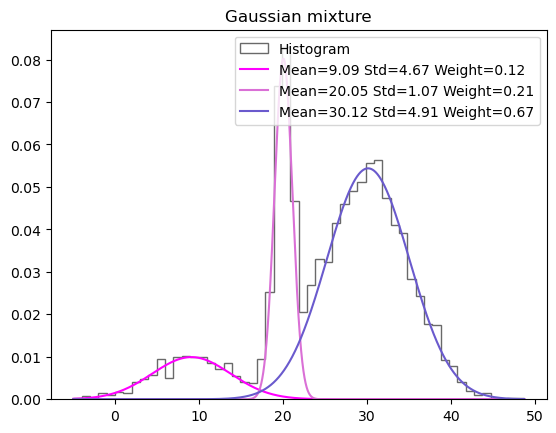

In [7]:
dev = np.sqrt(cov)  # standard deviation from the variance

gauss1 = weights[0]*norm(means[0], dev[0]).pdf(x)
gauss2 = weights[1]*norm(means[1], dev[1]).pdf(x)
gauss3 = weights[2]*norm(means[2], dev[2]).pdf(x)

plt.hist(data, bins=Nbins, density=True, edgecolor='dimgrey', histtype='step', label='Histogram')
plt.plot(x, gauss3, label=f'Mean={means[2]:.2f} Std={dev[2]:.2f} Weight={weights[2]:.2f}', color='fuchsia')
plt.plot(x, gauss2, label=f'Mean={means[1]:.2f} Std={dev[1]:.2f} Weight={weights[1]:.2f}', color='orchid')
plt.plot(x, gauss1, label=f'Mean={means[0]:.2f} Std={dev[0]:.2f} Weight={weights[0]:.2f}', color='slateblue')
plt.legend()
plt.title('Gaussian mixture')
plt.show()